In [224]:
import jedi.utils.noise_gen as noise
import matplotlib.pylab as plt
import numpy as np
from jedi.utils import plot
import cPickle
import datetime
import scipy.stats as stats
import seaborn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/simonhaxby/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [278]:
ls ../data/stability/sin/both_noise

noise_exin_(0.1_0.3).p  noise_exin_(0.3_0.3).p  noise_exin_(0.4_0.3).p


In [337]:
ds = cPickle.load(open("../data/stability/sin/both_noise/noise_exin_(0.3_0.3).p", "rb"))

In [338]:
errors = np.array(ds['force'][0])
derrors = np.array(ds['dforce'][0])
params = ds['parameters']

tstart, tstop = params['tstart'], params['tstop']

In [339]:
e = np.concatenate(errors[:])

In [340]:
e[1232]

-0.47256724646429216

(-4, 4)

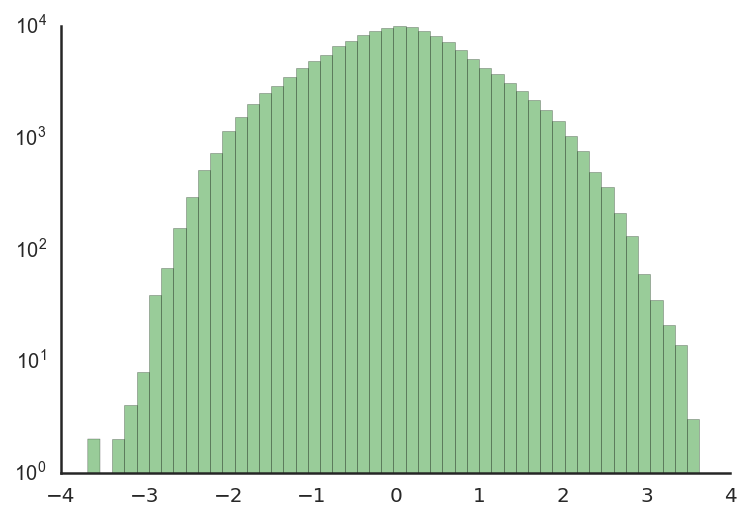

In [341]:
ax = seaborn.distplot(np.concatenate(derrors[:, 501:650]), color='g', kde=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale("log")
ax.set_xlim(-4,4)

(-4, 4)

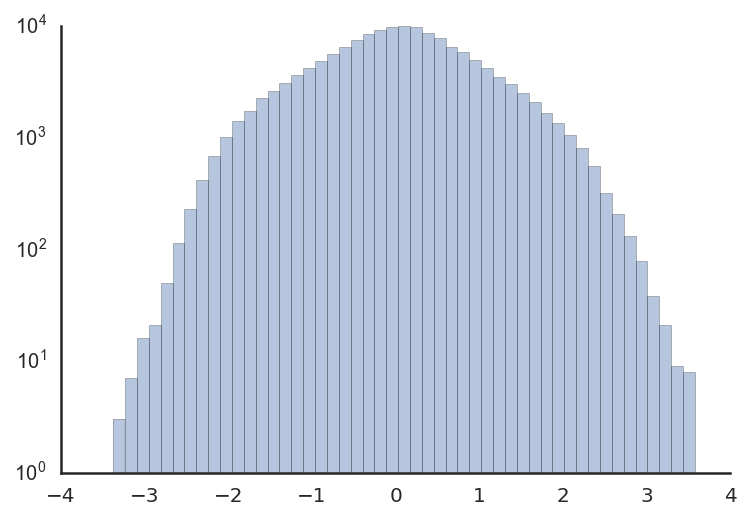

In [342]:
ax = seaborn.distplot(np.concatenate(errors[:, 501:650]), kde=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale("log")
ax.set_xlim(-4,4)

In [343]:
t = np.linspace(0,10,1002)
title = "meh"

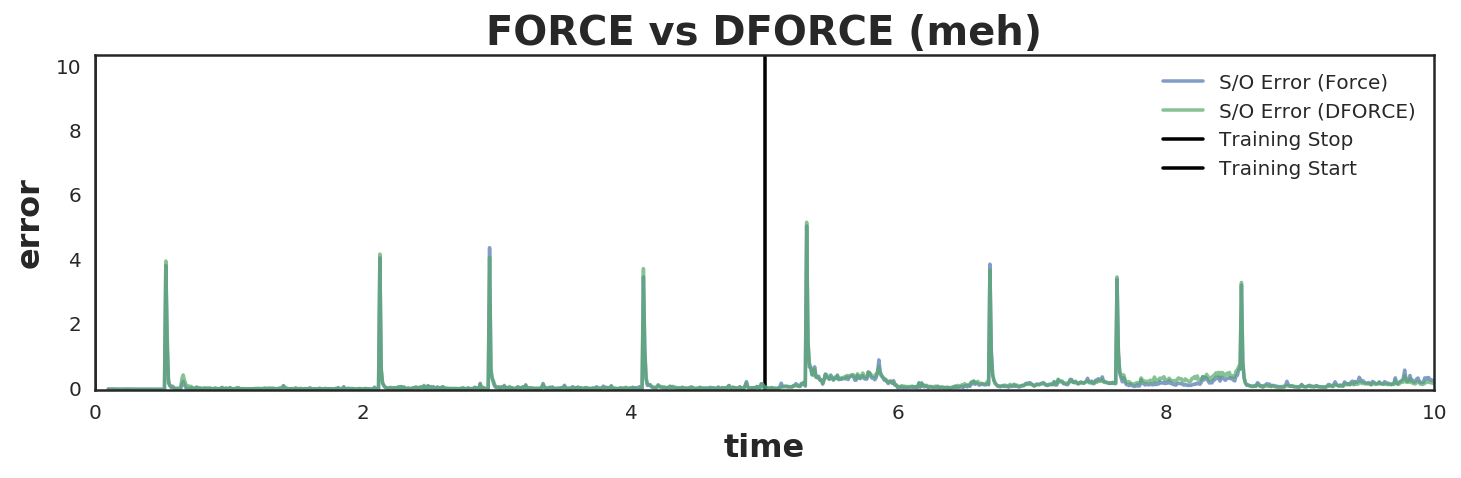

In [229]:
seaborn.set_style("white")
plt.figure(figsize=(12,3))
plot.cross_signal_error(errors, derrors, t, tstart, tstop,
                        title="FORCE vs DFORCE (%s)" % title, burn_in=10)

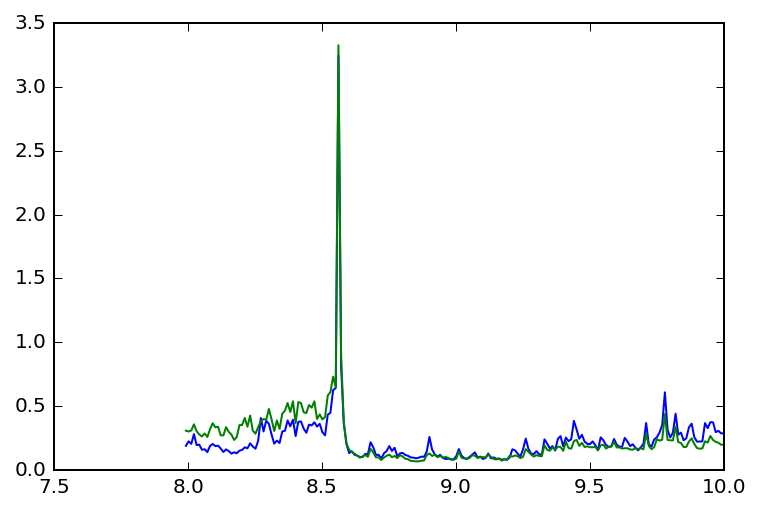

In [197]:
plt.plot(t[800:], np.mean(errors[:, 800:], 0))
plt.plot(t[800:], np.mean(derrors[:, 800:], 0))

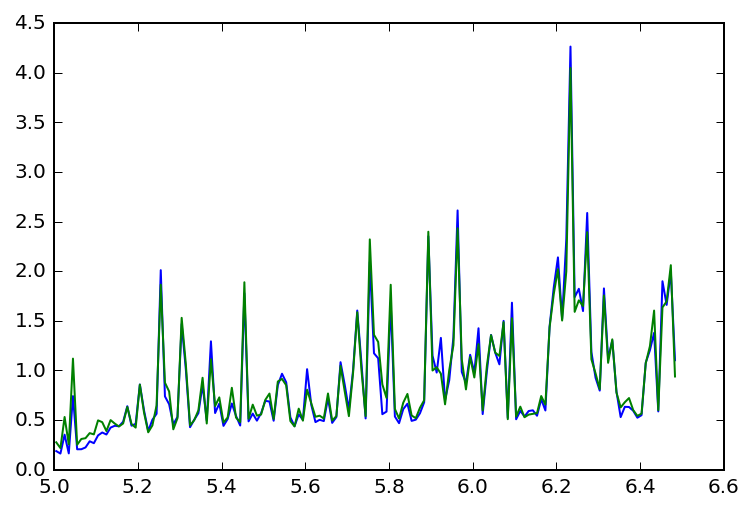

In [190]:
plt.plot(t[501:650], np.mean(errors[:, 501:650], 0))
plt.plot(t[501:650], np.mean(derrors[:, 501:650], 0))

{'tstart': 0, 't_count': 1002, 'tmax': 10, 'pE': 0.8, 'N': 300, 'sparsity': (0.1, 1, 1), 'lr': 1, 't': array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         9.99000000e+00,   1.00000000e+01,   1.00100000e+01]), 'rho': 1.25, 'noise_int_var': 0.5, 'tstop': 5, 'dt': 0.01}
FORCE --
Error mean: 1.0650
Error std: 1.2823

DFORCE --
Error mean: 0.9274
Error std: 1.1550

t-test: 2.11E-03


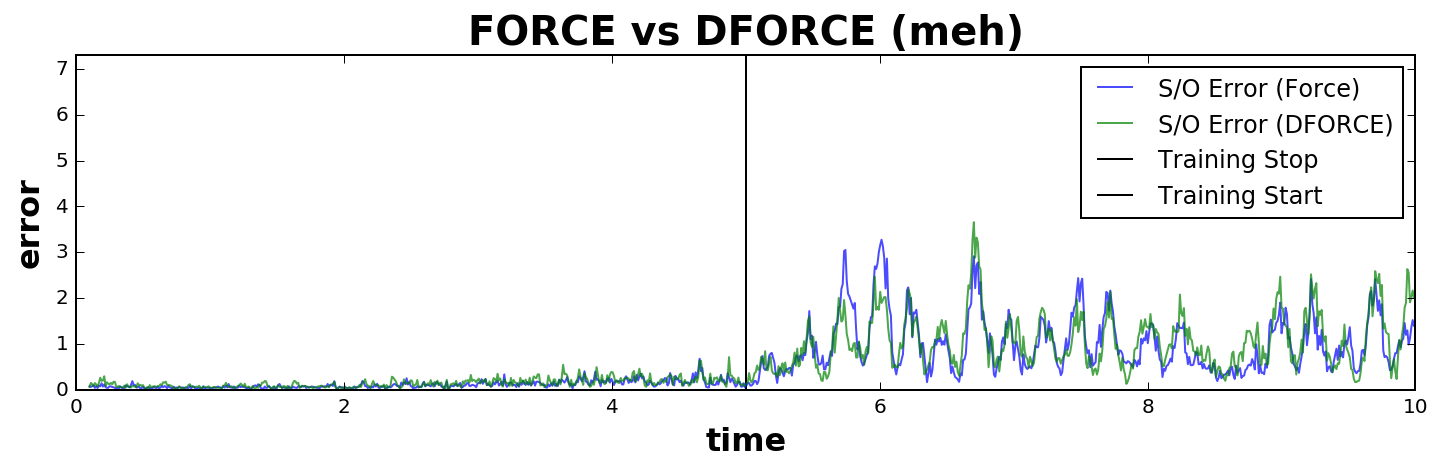

In [177]:
errors = np.array(ds['force'][0])**2
derrors = np.array(ds['dforce'][0])**2
params = ds['parameters']

tstart, tstop= params['tstart'], params['tstop']

ti = np.argmax(t > tstop)

post_train_e = errors[:, ti:650]
post_train_de = derrors[:, ti:650]

print params
print ("FORCE --")
print ("Error mean: %.4f" % np.mean(post_train_e ))
print ("Error std: %.4f\n" % np.std(post_train_e ))

print ("DFORCE --")
print ("Error mean: %.4f" % np.mean(post_train_de))
print ("Error std: %.4f\n" % np.std(post_train_de))

print("t-test: %.2E" %
      stats.ttest_ind(np.concatenate(post_train_e),
                      np.concatenate(post_train_de), equal_var=False)[1])


plt.figure(figsize=(12,3))
plot.cross_signal_error(errors, derrors, t, tstart, tstop,
                    title="FORCE vs DFORCE (%s)" % title, burn_in=10)

In [14]:
print "%.2E" % 2e-12

2.00E-12


In [8]:
print np.mean(pi)
print np.std(pi*2)

-1.02318153949e-16
1.04270512022


In [23]:
t = np.array([np.array([1,2,3]),
 np.array([2,3,4,])])**2

In [28]:
t[:, 1:]

array([[ 4,  9],
       [ 9, 16]])